In [10]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa.display

In [13]:
class Preprocessing:
    def load_audio(self, file_path: str) -> np.ndarray:
        """
        Load an audio file and return its waveform as a numpy array.
        
        Parameters:
        file_path (str): Path to the audio file.
        
        Returns:
        np.ndarray: Audio waveform, and sample rate.
        """
        audio, sr = librosa.load(file_path, sr=None)  # Load audio with original sampling rate
        return audio, sr

    def extract_spectrogram(self, audio: np.ndarray, sr: int = 22050) -> np.ndarray:
        """
        Convert the audio waveform to a Mel spectrogram.
        
        Parameters:
        audio (np.ndarray): The audio waveform.
        sr (int): The sampling rate of the audio.
        
        Returns:
        np.ndarray: Spectrogram (magnitude in decibels).
        """
        # Extract Mel-spectrogram using librosa's correct method signature
        spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512)
        
        # Convert to decibels (dB scale)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
        
        return spectrogram_db

    def augment_data(self, audio: np.ndarray, noise_factor: float = 0.005) -> np.ndarray:
        """
        Augment the audio by adding random noise.
        
        Parameters:
        audio (np.ndarray): The audio waveform.
        noise_factor (float): Factor controlling the amount of noise.
        
        Returns:
        np.ndarray: Noisy audio waveform.
        """
        noise = np.random.randn(len(audio))
        augmented_audio = audio + noise_factor * noise
        return augmented_audio

    def save_spectrogram(self, spectrogram: np.ndarray, file_path: str):
        """
        Save the spectrogram as a .npy file.
        
        Parameters:
        spectrogram (np.ndarray): The spectrogram to save.
        file_path (str): Path where to save the spectrogram file.
        """
        np.save(file_path, spectrogram)


In [14]:
def add_noise(audio: np.ndarray, noise_factor: float = 0.02) -> np.ndarray:
    """
    Adds random noise to an audio signal.
    
    Parameters:
    audio (np.ndarray): Input audio signal.
    noise_factor (float): Factor to scale the noise.
    
    Returns:
    np.ndarray: Noisy audio signal.
    """
    noise = np.random.randn(len(audio))
    noisy_audio = audio + noise_factor * noise
    
    # Clip the values to ensure they remain in the valid audio range (-1 to 1)
    noisy_audio = np.clip(noisy_audio, -1.0, 1.0)
    
    return noisy_audio

In [15]:
# Initialize the Preprocessing class
preprocess = Preprocessing()

# Load clean audio
clean_audio, sr = preprocess.load_audio("84-121123-0000.flac")

# Add noise to the clean audio
noisy_audio = add_noise(clean_audio)

# Save the noisy audio as a new .flac file
sf.write('noisy_audio.flac', noisy_audio, sr, format='FLAC')


In [16]:
# Extract spectrogram for clean audio
clean_spectrogram = preprocess.extract_spectrogram(clean_audio, sr)

# Extract spectrogram for noisy audio
noisy_spectrogram = preprocess.extract_spectrogram(noisy_audio, sr)

In [17]:
# Save the clean and noisy spectrograms
preprocess.save_spectrogram(clean_spectrogram, "clean_spectrogram.npy")
preprocess.save_spectrogram(noisy_spectrogram, "noisy_spectrogram.npy")

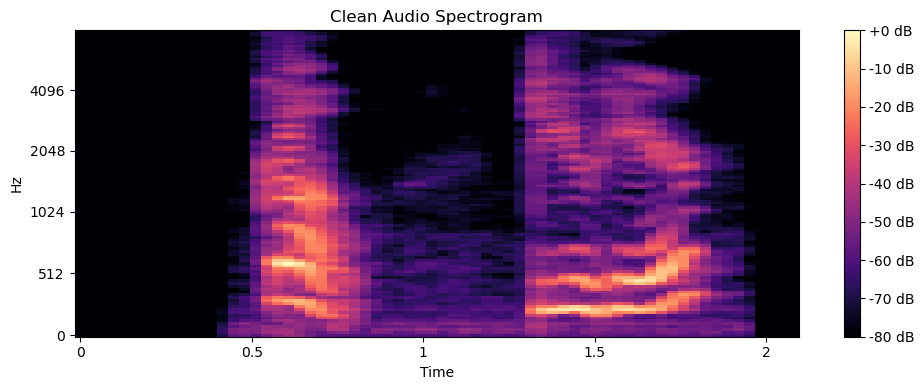

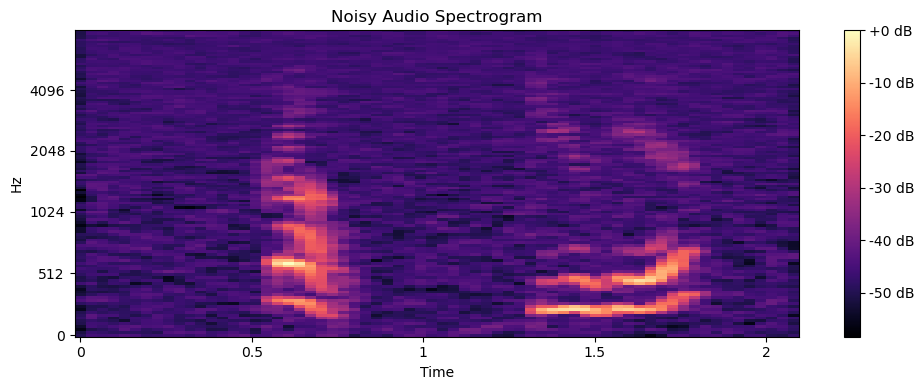

In [18]:
def plot_spectrogram(spectrogram, title):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plot clean and noisy spectrograms
plot_spectrogram(clean_spectrogram, 'Clean Audio Spectrogram')
plot_spectrogram(noisy_spectrogram, 'Noisy Audio Spectrogram')